## CREATING A BOW

In [1]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
corpus = [
    'Data Science is an overlap between Arts and Science',
    'Generally,Arts graduates are right-brained and Science graduates are left-brained',
    'Excelling in both Arts and Science at a time becomes difficult',
    'Natural Language Processing is a part of Data Science'
    ]

In [3]:
#CountVectorizer create the BoW model
bag_of_words_model = CountVectorizer()
print(bag_of_words_model.fit_transform(corpus).todense())

[[1 1 0 1 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 2 0]
 [0 1 2 1 0 0 0 0 2 0 0 0 1 2 0 0 0 1 0 0 0 0 0 1 1 0]
 [0 1 0 1 1 1 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 1 1]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 1 1 0 1 1 0 1 0]]


In [4]:
bag_of_word_df = pd.DataFrame(bag_of_words_model.fit_transform(corpus).todense())

In [5]:
bag_of_word_df.columns = sorted(bag_of_words_model.vocabulary_)
bag_of_word_df.head()

,an,and,are,arts,at,becomes,between,both,brained,data,...,language,left,natural,of,overlap,part,processing,right,science,time
0,1,1,0,1,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,2,0
1,0,1,2,1,0,0,0,0,2,0,...,0,1,0,0,0,0,0,1,1,0
2,0,1,0,1,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,1
3,0,0,0,0,0,0,0,0,0,1,...,1,0,1,1,0,1,1,0,1,0


In [6]:
#10 most frequent terms
bag_of_words_model_small = CountVectorizer(max_features = 10)
bag_of_word_df_small = pd.DataFrame(bag_of_words_model_small.fit_transform(corpus).todense())

In [7]:
bag_of_word_df_small.columns = sorted(bag_of_words_model_small.vocabulary_)
bag_of_word_df_small.head()

,an,and,are,arts,brained,data,graduates,is,right,science
0,1,1,0,1,0,1,0,1,0,2
1,0,1,2,1,2,0,2,0,1,1
2,0,1,0,1,0,0,0,0,0,1
3,0,0,0,0,0,1,0,1,0,1


In [12]:
# zip's law
from pylab import *
import nltk
nltk.download('stopwords')
from sklearn.datasets import fetch_20newsgroups
from nltk import word_tokenize
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
%matplotlib inline
import re
import string
from collections import Counter
newsgroups_data_sample = fetch_20newsgroups(subset ='train')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lizey\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [13]:
stop_words = stopwords.words('english')
stop_words = stop_words +list(string.printable)

In [14]:
tokenized_corpus = [word.lower() for sentence in df['description'] \
                    for word in word_tokenize(re.sub(r'([^\s\w]|_)+', ' ', sentence)) \
                    if word.lower() not in stop_words]

In [15]:
token_count_di = Counter(tokenized_corpus)
token_count_di.most_common(50)

[('test', 127045),
 ('status', 64366),
 ('provided', 52547),
 ('answer', 52114),
 ('cpe', 43012),
 ('result', 38702),
 ('type', 36609),
 ('power', 33976),
 ('anom', 31928),
 ('behaviour', 28901),
 ('removed', 26498),
 ('loopback', 25700),
 ('led', 25582),
 ('fault', 23301),
 ('id', 22825),
 ('odu', 21284),
 ('yes', 21063),
 ('ntd', 20635),
 ('green', 17291),
 ('nbn', 17057),
 ('modem', 16788),
 ('uni', 16363),
 ('ip', 15796),
 ('2019', 15294),
 ('red', 14865),
 ('tested', 14321),
 ('light', 13978),
 ('mac', 13882),
 ('alternate', 13763),
 ('isolation', 12900),
 ('run', 12555),
 ('signal', 12514),
 ('solid', 12049),
 ('powercycled', 11918),
 ('failed', 11774),
 ('time', 11660),
 ('address', 10945),
 ('connection', 10824),
 ('active', 10580),
 ('number', 10218),
 ('incidents', 10119),
 ('connected', 10054),
 ('none', 9918),
 ('service', 9904),
 ('orders', 9847),
 ('open', 9823),
 ('results', 9801),
 ('serial', 9443),
 ('fail', 9212),
 ('issue', 8859)]

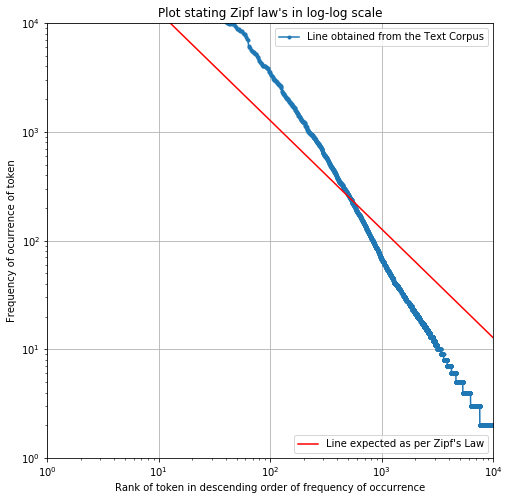

In [16]:
frequencies = [b for (a,b) in token_count_di.most_common(10000)]

tokens = [a for (a,b) in token_count_di.most_common(10000)]

ranks = range(1, len(frequencies)+1)

plt.figure(figsize=(8,8))

plt.ylim(1,10**4)

plt.xlim(1,10**4)

#Actual ranks and frequencies

obtained_line, = loglog(ranks, frequencies, marker=".", label="Line obtained from the Text Corpus")

obtained_legend = plt.legend(handles=[obtained_line], loc=1)

ax = plt.gca().add_artist(obtained_legend)

#Expected ranks and frequencies as per Zipf's law

expected_line, = plt.plot([1,frequencies[0]],[frequencies[0],1],color='r',label="Line expected as per Zipf's Law")

plt.legend(handles=[expected_line], loc=4)

title("Plot stating Zipf law's in log-log scale")

xlabel("Rank of token in descending order of frequency of occurrence")

ylabel("Frequency of ocurrence of token")

grid(True)

## TF-IDF

In [10]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import re

In [11]:
corpus = [
'Data Science is an overlap between Arts and Science',
'Generally, Arts graduates are right-brained and Science graduates are left-brained',
'Excelling in both Arts and Science at a time becomes difficult',
'Natural Language Processing is a part of Data Science'
]

AttributeError: 'str' object has no attribute 'sub'

In [21]:
tfidf_model = TfidfVectorizer()
print(tfidf_model.fit_transform(corpus).todense())

[[0.40332811 0.25743911 0.         0.25743911 0.         0.
  0.40332811 0.         0.         0.31798852 0.         0.
  0.         0.         0.         0.31798852 0.         0.
  0.         0.         0.40332811 0.         0.         0.
  0.42094668 0.        ]
 [0.         0.159139   0.49864399 0.159139   0.         0.
  0.         0.         0.49864399 0.         0.         0.
  0.24932199 0.49864399 0.         0.         0.         0.24932199
  0.         0.         0.         0.         0.         0.24932199
  0.13010656 0.        ]
 [0.         0.22444946 0.         0.22444946 0.35164346 0.35164346
  0.         0.35164346 0.         0.         0.35164346 0.35164346
  0.         0.         0.35164346 0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.18350214 0.35164346]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.30887228 0.         0.
  0.         0.         0.         0.30887228 0.39176

In [22]:
tfidf_df = pd.DataFrame(tfidf_model.fit_transform(corpus).todense())

tfidf_df.columns = sorted(tfidf_model.vocabulary_)

tfidf_df.head()

,an,and,are,arts,at,becomes,between,both,brained,data,...,language,left,natural,of,overlap,part,processing,right,science,time
0,0.403328,0.257439,0.000000,0.257439,0.000000,0.000000,0.403328,0.000000,0.000000,0.317989,...,0.000000,0.000000,0.000000,0.000000,0.403328,0.000000,0.000000,0.000000,0.420947,0.000000
1,0.000000,0.159139,0.498644,0.159139,0.000000,0.000000,0.000000,0.000000,0.498644,0.000000,...,0.000000,0.249322,0.000000,0.000000,0.000000,0.000000,0.000000,0.249322,0.130107,0.000000
2,0.000000,0.224449,0.000000,0.224449,0.351643,0.351643,0.000000,0.351643,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.183502,0.351643
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.308872,...,0.391765,0.000000,0.391765,0.391765,0.000000,0.391765,0.391765,0.000000,0.204439,0.000000


In [23]:
tfidf_model_small = TfidfVectorizer(max_features=10)

tfidf_df_small = pd.DataFrame(tfidf_model_small.fit_transform(corpus).todense())

tfidf_df_small.columns = sorted(tfidf_model_small.vocabulary_)

tfidf_df_small.head()

,an,and,are,arts,brained,data,graduates,is,right,science
0,0.491042,0.313426,0.000000,0.313426,0.000000,0.387143,0.000000,0.387143,0.000000,0.512492
1,0.000000,0.170061,0.532867,0.170061,0.532867,0.000000,0.532867,0.000000,0.266433,0.139036
2,0.000000,0.612172,0.000000,0.612172,0.000000,0.000000,0.000000,0.000000,0.000000,0.500491
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.640434,0.000000,0.640434,0.000000,0.423897


## 文本相似

In [24]:
from nltk import word_tokenize

from nltk.stem import WordNetLemmatizer

from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.metrics.pairwise import cosine_similarity

lemmatizer = WordNetLemmatizer()

In [25]:
pair1 = ["What you do defines you","Your deeds define you"]

pair2 = ["Once upon a time there lived a king.", "Who is your queen?"]

pair3 = ["He is desperate", "Is he not desperate?"]

In [26]:
def extract_text_similarity_jaccard (text1, text2):
    words_text1 = [lemmatizer.lemmatize(word.lower()) for word in word_tokenize(text1)]
    words_text2 = [lemmatizer.lemmatize(word.lower()) for word in word_tokenize(text2)]
    nr = len(set(words_text1).intersection(set(words_text2)))
    dr = len(set(words_text1).union(set(words_text2)))
    jaccard_sim = nr/dr
    return jaccard_sim

In [27]:
extract_text_similarity_jaccard(pair1[0],pair1[1])

0.14285714285714285

In [28]:
extract_text_similarity_jaccard(pair2[0],pair2[1])

0.0

In [37]:
1/7

0.14285714285714285

In [33]:
words_text1 = [lemmatizer.lemmatize(word.lower()) for word in word_tokenize(pair1[0])]
words_text2 = [lemmatizer.lemmatize(word.lower()) for word in word_tokenize(pair1[1])]

In [35]:
words_text1

len(set(words_text1).intersection(set(words_text2)))

1

In [34]:
words_text2

['your', 'deed', 'define', 'you']

In [22]:
a = df['description'][1]
a

'EU is reporting slow internet connection.\r\nProvisioning between NBN and Optus has been checked and no issues found.\r\nOptus systems are showing no sync.\r\nEU has reported visible no damage to NBN equipment.\r\nEU has replaced Ethernet cable between WNTD and RG.\r\nEU has tested using an Ethernet device connected directly to the WNTD and experienced fault.\r\n\r\nPlease investigate.\r\n\r\nOpen orders - none\r\n\r\nFault Type - Intermittent service/dropouts\r\n\r\n##DIAGNOSTIC QUESTIONS##\r\nHas an isolation test been run? - Yes\r\nAny active incidents at time of fault? - No\r\nPower Status - Answer not provided\r\nPower Behaviour - Answer not provided\r\nLED Status - Answer not provided\r\nLED Behaviour - Answer not provided\r\nODU Status - Answer not provided\r\nODU Behaviour - Answer not provided\r\nUNI-D Status - Answer not provided\r\nUNI-D Behaviour - Answer not provided\r\nSignal Strengths Status - Answer not provided\r\nPorts being used - Answer not provided\r\nNTD Serial N

In [49]:
b = df['description'][2]
b

'ISSUE:  Red ODU\r\n\r\nService Address:|Address Removed|\r\nContact Number:|Phone# Removed|\r\n\r\nService Location ID: ANOM_ID47460\r\nService Bandwidth/Traffic (Plan Speed): FWPlus\r\nS Tag: \r\nc Tag: 3508\r\n\r\nAssigned Port/ UNID: 1\r\nUNID ON or OFF?: ON\r\nNTD SERIAL NUMBER\r\n\r\nAdditional note: (TS)\r\nrestart nbn fixed wireless box\r\nstill getting red odu\r\n\r\nOpen orders - none\r\n\r\nFault Type - No data connection/red optical\r\n\r\n##DIAGNOSTIC QUESTIONS##\r\nPower Status - Green\r\nLED Status - Amber\r\nODU Status - Red\r\nUNI-D Status - Amber\r\nSignal Strengths Status - Red\r\nPorts being used - D1\r\nWhat CPE Is Connected? - Huawei HG659\r\nWhat is the CPE MAC address? - 5CA86A1353DA\r\nHas the CPE been powercycled? - Yes\r\nHas an alternate CPE been tested? - No\r\nHas an isolation test been run? - Yes\r\nAny active incidents at time of fault? - Yes\r\nPower Behaviour - Answer not provided\r\nLED Behaviour - Answer not provided\r\nODU Behaviour - Answer not pro

In [52]:
x1 = re.compile("\n|\r")
y1 = x1.split(b)
for i in y1:
    if i == '':
        y1.remove(i)

In [55]:
for i in y1:
    if i == '':
        y1.remove(i)
y1

['ISSUE:  Red ODU',
 'Service Address:|Address Removed|',
 'Contact Number:|Phone# Removed|',
 'Service Location ID: ANOM_ID47460',
 'Service Bandwidth/Traffic (Plan Speed): FWPlus',
 'S Tag: ',
 'c Tag: 3508',
 'Assigned Port/ UNID: 1',
 'UNID ON or OFF?: ON',
 'NTD SERIAL NUMBER',
 'Additional note: (TS)',
 'restart nbn fixed wireless box',
 'still getting red odu',
 'Open orders - none',
 'Fault Type - No data connection/red optical',
 '##DIAGNOSTIC QUESTIONS##',
 'Power Status - Green',
 'LED Status - Amber',
 'ODU Status - Red',
 'UNI-D Status - Amber',
 'Signal Strengths Status - Red',
 'Ports being used - D1',
 'What CPE Is Connected? - Huawei HG659',
 'What is the CPE MAC address? - 5CA86A1353DA',
 'Has the CPE been powercycled? - Yes',
 'Has an alternate CPE been tested? - No',
 'Has an isolation test been run? - Yes',
 'Any active incidents at time of fault? - Yes',
 'Power Behaviour - Answer not provided',
 'LED Behaviour - Answer not provided',
 'ODU Behaviour - Answer not 

In [43]:
x = re.compile("\n|\r")
y = x.split(a)
for i in y:
    if i == '':
        y.remove(i)

In [57]:
for i in y:
    if i == '':
        y.remove(i)

In [48]:
y

['EU is reporting slow internet connection.',
 'Provisioning between NBN and Optus has been checked and no issues found.',
 'Optus systems are showing no sync.',
 'EU has reported visible no damage to NBN equipment.',
 'EU has replaced Ethernet cable between WNTD and RG.',
 'EU has tested using an Ethernet device connected directly to the WNTD and experienced fault.',
 'Please investigate.',
 'Open orders - none',
 'Fault Type - Intermittent service/dropouts',
 '##DIAGNOSTIC QUESTIONS##',
 'Has an isolation test been run? - Yes',
 'Any active incidents at time of fault? - No',
 'Power Status - Answer not provided',
 'Power Behaviour - Answer not provided',
 'LED Status - Answer not provided',
 'LED Behaviour - Answer not provided',
 'ODU Status - Answer not provided',
 'ODU Behaviour - Answer not provided',
 'UNI-D Status - Answer not provided',
 'UNI-D Behaviour - Answer not provided',
 'Signal Strengths Status - Answer not provided',
 'Ports being used - Answer not provided',
 'NTD S

In [58]:
x = re.compile("\n|\r")
for list in df['description']:
    y = x.split(list)
    for i in list:
        if i == '':
            list.remove(i)